In [1]:
import requests
import json
from citipy import citipy
import random
import pandas as pd 
import matplotlib.pyplot as plt
from api_keys import weather_api_key

In [2]:
url = "http://api.openweathermap.org/data/2.5/weather?"

In [3]:
print(weather_api_key)

68970bdad69e00449a9f178cc072f6f2


In [4]:
#List Generation
cities = []
state_list = []
lat_list = []
lon_list = []
temp_list = []
humid_list = []
cloud_list = []
wind_list = []

In [5]:
#data_dict = {
    #"City": cities,
    #"Country Code": state_list,
    #"Latitude (N+/S-)": lat_list,
    #"Longitude (E+/W-)": lon_list,
    #"Temperature (F)": temp_list,
    #"Humidity (%)": humid_list,
    #"Cloudiness (%)": cloud_list,
    #"Wind Speed (mph)": wind_list
#}

In [6]:
def getcities():
    while len(cities) < 20:
        restart=True
        while restart:
            restart=False
            lat = random.uniform(-90, 90)
            lon = random.uniform(-180, 180)
            cityget = citipy.nearest_city(lat, lon)
            city = str(cityget.city_name)
            state = str(cityget.country_code)
            if city in cities:
                print("Duplicate City Found")
                restart=True
            else:
                cities.append(city)
                state_list.append(state)
                city_length = len(cities)
                print(f"Processing weather data for {city}, {state} | City number {city_length}")

In [7]:
def getweather():
    for city in cities:
        try:
            call_url = url + "q=" + city + "&units=imperial&appid=" + "68970bdad69e00449a9f178cc072f6f2"
            city_data = requests.get(call_url).json()
            lat_list.append(city_data['coord']['lat'])
            lon_list.append(city_data['coord']['lon'])
            temp_list.append(city_data['main']['temp'])
            humid_list.append(city_data['main']['humidity'])
            cloud_list.append(city_data['clouds']['all'])
            wind_list.append(city_data['wind']['speed'])
            print(f"Sucessfully Processed weather data for {city}")
        except KeyError:
            print(f"Failed to collect data for {city}")
            pass

In [8]:
def MegaFunction(pull_number):
    print("Begining Data Collection")
    print("-----------------------------------------")
    # First Break Condition, limits list size to intended 500 cities
    while len(cities) < pull_number:
        # Restart loop condition to pull new city without appending the duplicate
        restart=True
        while restart:
            restart=False
            #Lat/Long and city name pull
            lat = random.uniform(-90, 90)
            lon = random.uniform(-180, 180)
            cityget = citipy.nearest_city(lat, lon)
            city = str(cityget.city_name)
            state = str(cityget.country_code)
            if city in cities:
                #Duplicate check, if already found, will loop back to top and pull new city without adding to lists
                print("Duplicate City Found")
                restart=True
            else:
                #URL for call
                call_url = url + "q=" + city + "," + state + "&units=imperial&appid=" + weather_api_key
                try:
                    #Attempts the API Pull, if KeyError at the first list append due to bad city, will not append to lists and will skip                           with error message that the city failed to register a data pull
                    city_data = requests.get(call_url).json()
                    lat_list.append(city_data['coord']['lat'])
                    lon_list.append(city_data['coord']['lon'])
                    temp_list.append(city_data['main']['temp'])
                    humid_list.append(city_data['main']['humidity'])
                    cloud_list.append(city_data['clouds']['all'])
                    wind_list.append(city_data['wind']['speed'])
                    cities.append(city)
                    state_list.append(state)
                    city_length = len(cities)
                    print(f"Processing weather data for {city}, {state} | City number {city_length}")
                except KeyError:
                    #Key Error will catch and loop here before appending to any lists
                    print(f"Failed to collect data for {city}, {state}")
                    restart=True
                if len(cities) == pull_number:
                    #Second break conditon to hit limit
                    print("-----------------------------------------")
                    print(f"Weather Data collection complete with {(len(cities))} cities collected")
                    break

In [9]:
pull_number = int(input("How many cities would you like to pull data for?: "))
MegaFunction(pull_number)

Begining Data Collection
-----------------------------------------
Processing weather data for nizhniy kuranakh, ru | City number 1
Processing weather data for bredasdorp, za | City number 2
Processing weather data for kapaa, us | City number 3
Processing weather data for tiznit, ma | City number 4
Processing weather data for murwara, in | City number 5
Duplicate City Found
Processing weather data for georgetown, sh | City number 6
Processing weather data for kailua, us | City number 7
Processing weather data for new norfolk, au | City number 8
Failed to collect data for gonyu, hu
Processing weather data for nikolskoye, ru | City number 9
Processing weather data for busselton, au | City number 10
-----------------------------------------
Weather Data collection complete with 10 cities collected


In [10]:
#getcities()

In [11]:
#getweather()

In [10]:
print(cities)
print(lat_list)
print(lon_list)

['nizhniy kuranakh', 'bredasdorp', 'kapaa', 'tiznit', 'murwara', 'georgetown', 'kailua', 'new norfolk', 'nikolskoye', 'busselton']
[58.84, -34.53, 22.08, 29.58, 23.85, -7.93, 21.4, -42.78, 59.7, -33.65]
[125.49, 20.04, -159.32, -9.5, 80.4, -14.42, -157.74, 147.06, 30.79, 115.33]


In [11]:
data_dict = {
    "City": cities,
    "Country Code": state_list,
    "Latitude (N+/S-)": lat_list,
    "Longitude (E+/W-)": lon_list,
    "Temperature (F)": temp_list,
    "Humidity (%)": humid_list,
    "Cloudiness (%)": cloud_list,
    "Wind Speed (mph)": wind_list
}

In [12]:
weather_data = pd.DataFrame(data_dict)

In [13]:
weather_data

,City,Country Code,Latitude (N+/S-),Longitude (E+/W-),Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,nizhniy kuranakh,ru,58.84,125.49,6.22,92,100,2.64
1,bredasdorp,za,-34.53,20.04,59.00,47,98,18.34
2,kapaa,us,22.08,-159.32,64.40,93,1,5.82
3,tiznit,ma,29.58,-9.50,79.70,19,55,11.56
4,murwara,in,23.85,80.40,68.16,40,0,3.44
5,georgetown,sh,-7.93,-14.42,74.34,79,39,19.71
6,kailua,us,21.40,-157.74,71.49,100,90,2.08
7,new norfolk,au,-42.78,147.06,53.60,81,90,2.06
8,nikolskoye,ru,59.70,30.79,49.66,93,90,2.24
9,busselton,au,-33.65,115.33,58.98,39,0,13.09


In [14]:
weather_data.to_csv("weather_data_test.csv", encoding="utf-8", index=True, header=True)

<function matplotlib.pyplot.show(close=None, block=None)>

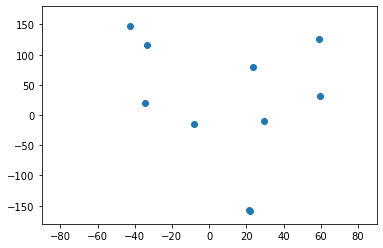

In [15]:
x = weather_data['Longitude (E+/W-)']
y = weather_data['Latitude (N+/S-)']
plt.scatter(y, x)
plt.xlim(-90, 90)
plt.ylim(-180, 180)
plt.show